![](https://uploads-ssl.webflow.com/62233c592d2a1e009d42f46c/6414802c0a2bea367cbc795b_logo-jedha-square.svg)

# A la découverte de OpenAI Gym

Afin d'implémenter l'environnement de l'agent, nous allons utiliser une bibliothèque appelée **OpenAI Gym**!

![AE_loop](https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/LEAD/Reinforcement-Learning/AE_loop.png)

Il est possible de générer de nombreux types d'environnements différents à l'aide de Gym, et même de créer vos propres environnements personnalisés à l'aide de Gym, mais nous nous concentrerons principalement sur les environnements déjà intégrés.

* [AtariToggle](https://www.gymlibrary.dev/environments/atari/)
* [MuJoCoToggle](https://www.gymlibrary.dev/environments/mujoco/)
* [Toy TextToggle](https://www.gymlibrary.dev/environments/toy_text/)
* [Classic ControlToggle](https://www.gymlibrary.dev/environments/classic_control/)
* [Box2DToggle](https://www.gymlibrary.dev/environments/box2d/)

Dans cette démo, nous verrons rapidement comment configurer ces différents types d'environnements.

<h2 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong>Environnements Atari 🧐🧐 </strong></span></h2>

Les jeux Atari ont été un sujet très important dans l'histoire de l'apprentissage par renforcement (et dans l'histoire des jeux vidéo) depuis que Deep Mind a développé des modèles qui ont réussi à atteindre des performances surhumaines sur ces jeux. Cependant, Atari a un accès limité à ses émulateurs de jeux, nous ne pourrons donc malheureusement pas utiliser cette branche de la bibliothèque.

Pour définir des environnements, nous devons utiliser la méthode `.make`  de la bibliothèque `gym`.

In [1]:
#!pip3 install gym[atari,accept-rom-license]

In [2]:
import gym
print("[INFO] : Version Gym : ", gym.__version__)

envs_dict = gym.envs.registry
print("[INFO] : Number of all environnements = ", len(envs_dict))
#print("[INFO] : Environnements names : ", list(envs_dict.keys()))

[INFO] : Version Gym :  0.25.2
[INFO] : Number of all environnements =  44


<h2 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong>Génération d'environnement général </strong></span></h2>

Cet ensemble d'environnements vous permet de simuler des "créatures" 3D dans le but de les déplacer.

In [3]:
!pip3 install gym[mujoco]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 2.5 MB/s eta 0:00:00


In [4]:
%env MUJOCO_GL=egl

env: MUJOCO_GL=egl


Utilisez la méthode `.make(...)` pour générer les environnements.

In [5]:
env = gym.make("HalfCheetah-v4")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In order to initialize the environment, use `.reset()`

In [6]:
env.reset()

array([ 0.05710843, -0.02425262,  0.0147062 , -0.02746046,  0.07756786,
       -0.06843409,  0.09205387,  0.09223315,  0.02671864, -0.11191261,
       -0.17388171, -0.06084056,  0.11943866,  0.0968993 , -0.01405666,
        0.00582769, -0.0625603 ])

In [7]:
env.reset().shape

(17,)

L'état est composé de cet ensemble de coordonnées :

- 0 : coordonnée y de la pointe avant
- 1 : angle de la pointe avant
- 2 : angle du second rotor
- 3 : angle du deuxième rotor
- 4 : vitesse de la pointe selon l'axe des abscisses
- 5 : vitesse de la pointe selon l'axe y
- 6 : vitesse angulaire de la pointe avant
- 7 : vitesse angulaire du deuxième rotor
- 8 : abscisse de la pointe avant
- 9 : coordonnée y de la pointe avant
- 10 : angle de la pointe avant
- 11 : angle du deuxième rotor
- 12 : angle du deuxième rotor
- 13 : vitesse de la pointe selon l'axe des abscisses
- 14 : vitesse de la pointe selon l'axe y
- 15 : vitesse angulaire de la pointe avant
- 16 : vitesse angulaire du second rotor

Afin de comprendre l'espace d'observation, vous pouvez utiliser l'attribut `.observation_space`.

In [8]:
env.observation_space

Box(-inf, inf, (17,), float64)

L'espace d'action est accessible par `.action_space`

In [9]:
env.action_space

Box(-1.0, 1.0, (6,), float32)

L'action et l'espace d'action dans ce cas sont continus, ce qui pose un problème d'apprentissage par renforcement très difficile.

Pour effectuer une action auprès de l'agent, vous pouvez utiliser la méthode `.step(...)`.



In [10]:
import numpy as np
action = np.random.uniform(low=-1, high=1, size=env.action_space.shape)
env.step(action)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


(array([ 0.06694641,  0.02170251,  0.29245433, -0.02445927,  0.05890581,
         0.26802604, -0.19327316, -0.16468963,  0.99137023, -0.67763595,
        -0.63466301,  6.44611322, -1.17939686,  3.45101627,  9.24792599,
        -2.13071228, -5.25971046]),
 0.5946545101891451,
 False,
 {'x_position': 0.10031954908929551,
  'x_velocity': 0.7701576716638705,
  'reward_run': 0.7701576716638705,
  'reward_ctrl': -0.17550316147472544})

Le résultat d'une action contient :
- le prochain état observé,
- la récompense,
- le statut de fin de l'épisode et
- Quelques informations supplémentaires.

Il existe également une méthode plus simple pour effectuer des actions aléatoires.

In [11]:
action = env.action_space.sample()
print(action)
env.step(action)

[ 0.00722697  0.12819815 -0.00547261 -0.53478634 -0.50031173 -0.52825505]


(array([ 0.03381583,  0.02246292,  0.22774783,  0.08314578,  0.1111363 ,
         0.15646325, -0.12605159, -0.31943311, -0.78912073, -0.66470615,
         0.50261181, -4.80652751,  2.72141675, -0.63494842, -7.87293409,
         2.02324203, -1.49602713]),
 -0.2968728441845765,
 False,
 {'x_position': 0.08963529989259034,
  'x_velocity': -0.21368498393410346,
  'reward_run': -0.21368498393410346,
  'reward_ctrl': -0.08318786025047303})

Il est toujours agréable de pouvoir visualiser à quoi ressemble l'environnement à un moment donné pour s'assurer que l'agent choisit les actions appropriées. Pour cela, vous pouvez utiliser la méthode `.render(...)`, qui a deux modes `human` qui rendront l'environnement dans une fenêtre de visualisation externe, et `rgb_array` qui sortiront un tableau numpy que vous pourrez ensuite visualiser avec `matplotlib` ou `plotly`.

In [12]:
# Si vous êtes sur Colab, l'exécution de cette cellule fera planter votre environnement d'exécution
# La raison est simple : les serveurs Colab n'ont pas de sortie graphique, alors que render essaie d'utiliser
# les drivers graphiques du serveur
#env = gym.make("HalfCheetah-v4", render_mode='human')
#env.reset()
#env.render()

In [13]:
env = gym.make("HalfCheetah-v4", render_mode='rgb_array')
env.reset()
img = env.render()[0]

In [14]:
#!pip3 install plotly pandas matplotlib

In [15]:
import plotly.express as px
from matplotlib import pyplot as plt

In [16]:
px.imshow(img)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



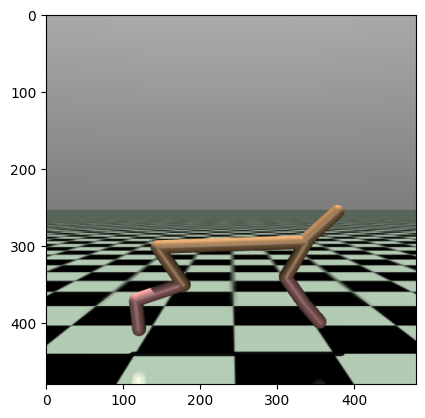

In [17]:
plt.imshow(img)